In [ ]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine

In [4]:
# crear conexion a BD
server = '127.0.0.1'    #Ip servidor
database = 'master'     #conectarse a la bd maestra SQL Server
username = 'sa'         #Usuario
password = '12345678'   #Contraseña

# Nombre de la BD
db_name = "actividadETL"

# Conectarse a actividadETL
conn_str = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={db_name};UID={username};PWD={password}"
conn = pyodbc.connect(conn_str)
cur = conn.cursor() # Crear cursor
print(f"Conectado satisfactoriamente a la base {db_name}" )

Conectado satisfactoriamente a la base actividadETL


In [5]:
# Se crea una funcion para cargar las tablas de sql server a un dataframe

def cargar_tabla_sql(conn, tabla):
    # Se crea la conexion
    cur = conn.cursor()
    
    # Verificar si la tabla existe
    cur.execute(f"SELECT COUNT(*) FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = '{tabla}'")
    existe = cur.fetchone()[0]
    
    if existe:
        # Cargar la tabla en un DataFrame
        query = f"SELECT * FROM {tabla}"
        df = pd.read_sql(query, conn)
        print(f"Tabla '{tabla}' cargada exitosamente.")
        return df
    else:
        print(f"La tabla '{tabla}' no existe en la base de datos.")
        return None

In [36]:
# Cargar la tabla estudiantes en el dataframe estudiantes
tabla = 'estudiantes'

df_estudiantes= cargar_tabla_sql(conn, tabla)
df_estudiantes.info()

C:\Users\jahir\AppData\Local\Temp\ipykernel_6264\3744948366.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Tabla 'estudiantes' cargada exitosamente.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185487 entries, 0 to 185486
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Periodo Reg            185487 non-null  object
 1   cohorte                185487 non-null  object
 2   Periodo_Academico      185487 non-null  object
 3   Tipo_periodo           185487 non-null  object
 4   Año                    185487 non-null  int64 
 5   Numero_Identificacion  185487 non-null  object
 6   Codigo_Estudiante      185487 non-null  int64 
 7   Cohorte1               185487 non-null  object
 8   Tipo_Acceso            185487 non-null  object
 9   Nombre                 185487 non-null  object
 10  Estrato_Economico      185487 non-null  object
 11  Genero                 185487 non-null  object
 12  Estado_Civil           185487 non-null  object
 13  programa               185487 non-null  int64 
dtypes: int64(3

In [37]:
# Cargar la tabla programas en el dataframe estudiantes
tabla = 'programas'

df_programas= cargar_tabla_sql(conn, tabla)
df_programas.info()

C:\Users\jahir\AppData\Local\Temp\ipykernel_6264\3744948366.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Tabla 'programas' cargada exitosamente.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185487 entries, 0 to 185486
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Periodo_Academico   185487 non-null  object
 1   Programa            185487 non-null  object
 2   Codigo_SNIES        185487 non-null  int64 
 3   Ciclo               185487 non-null  object
 4   Facultad            185487 non-null  object
 5   Nivel_de_Formacion  185487 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.5+ MB


In [38]:
# Se crea funcion para verificar si las columnas tienen campos Vacios o nulos o espacios en blanco

def verificar_datos(df):
    
    # se cuentan los valores nulos, duplicados y vacios en el dataframe
    nulos = df.isnull().sum()
    vacios = (df.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum()
    duplicados = df.apply(lambda col: col.duplicated(keep=False).sum())

    
    # Filtrar solo las columnas con valores nulos o vacíos
    columnas_con_problemas = pd.DataFrame({"Nulos": nulos, "Vacios": vacios, "Duplicados": duplicados})
    columnas_con_problemas = columnas_con_problemas[(columnas_con_problemas["Nulos"] > 0) | (columnas_con_problemas["Vacios"] > 0) |
                                                    (columnas_con_problemas["Duplicados"] > 0)]
    
    if columnas_con_problemas.empty:
        print(f"No hay columnas con valores nulos o vacíos.")
    else:
        print(f"Columnas con valores nulos o vacíos:")
        #print(columnas_con_problemas)

    return columnas_con_problemas



In [39]:
# Verificar si hay vacios, nulos o duplicados
verificar_datos(df_estudiantes)


Columnas con valores nulos o vacíos:


,Nulos,Vacios,Duplicados
Periodo Reg,0,0,185487
cohorte,0,0,185487
Periodo_Academico,0,0,185487
Tipo_periodo,0,0,185487
Año,0,0,185487
Numero_Identificacion,0,0,180121
Codigo_Estudiante,0,0,179267
Cohorte1,0,0,185487
Tipo_Acceso,0,0,185487
Nombre,0,0,176466


In [40]:
# Verificar si hay vacios, nulos o duplicados
verificar_datos(df_programas)

Columnas con valores nulos o vacíos:


,Nulos,Vacios,Duplicados
Periodo_Academico,0,0,185487
Programa,0,0,185485
Codigo_SNIES,0,0,185485
Ciclo,0,0,185487
Facultad,0,0,185487
Nivel_de_Formacion,0,0,185487


In [41]:
# En la tabla estudiantes es normal que hayan estudiantes duplicados porque los estudiantes se repiten por periodos, Pero no se puede tener 
# estudiantes repetidos en el mismo periodo por lo que se va a realizar una llave entre periodo academico y el codigo del estudiante 
# para ver si hay repetidos con la misma llave

# se crea una funcion para crear una columna a partir de dos columnas del dataframe

def concatenar_col(df, col1, col2, nueva_columna):
   
    if col1 in df.columns and col2 in df.columns:
        df[nueva_columna] = df[col1].astype(str) + "_" + df[col2].astype(str)
        print(f"Columna '{nueva_columna}' creada exitosamente.")
    else:
        print("Error: Una o ambas columnas no existen en el DataFrame.")

    return df

In [ ]:
# Se crea la columna percod que es la llave entre periodo academico y codigo del estudiante en estudiantes
col1 = 'Periodo_Academico'
col2= 'Codigo_Estudiante'
col_nueva = 'percod'
df_estudiantes = concatenar_col(df_estudiantes, col1, col2, col_nueva)

df_estudiantes.info()

Columna 'percod' creada exitosamente.


,Periodo Reg,cohorte,Periodo_Academico,Tipo_periodo,Año,Numero_Identificacion,Codigo_Estudiante,Cohorte1,Tipo_Acceso,Nombre,Estrato_Economico,Genero,Estado_Civil,programa,percod
0,2017-1,2017-1,2017-1,SEMESTRAL,2017,1144066761,2170650,2017-1,ADMISION A PRIMER SEMESTRE,Molina Jimenez Diego Felipe,1,Masculino,No Registra,20095,2017-1_2170650
1,2024-3,2024-3,2024-3,SEMESTRAL,2024,2062940,2249359,2024-3,ADMISION A PRIMER SEMESTRE,Donatti Duran Angel Luisiano,1,Masculino,Soltero,20096,2024-3_2249359
2,2021-3,2021-3,2021-3,SEMESTRAL,2021,1114812631,2215696,2021-3,ADMISION A PRIMER SEMESTRE,Vargas Martinez Santiago,1,Masculino,Soltero,20100,2021-3_2215696


In [43]:
# Verificar si hay duplicados en percod

verificar_datos(df_estudiantes)

Columnas con valores nulos o vacíos:


,Nulos,Vacios,Duplicados
Periodo Reg,0,0,185487
cohorte,0,0,185487
Periodo_Academico,0,0,185487
Tipo_periodo,0,0,185487
Año,0,0,185487
Numero_Identificacion,0,0,180121
Codigo_Estudiante,0,0,179267
Cohorte1,0,0,185487
Tipo_Acceso,0,0,185487
Nombre,0,0,176466


In [44]:
# En percod no pueden haber duplicados por lo que se tienen que eliminar los duplicados
def eliminar_duplicados(df, columna):
    
    if columna in df.columns:
        df_limpio = df.drop_duplicates(subset=[columna], keep="first").reset_index(drop=True)
        print(f"Se eliminaron {len(df) - len(df_limpio)} filas duplicadas basadas en la columna '{columna}'.")
        return df_limpio
    else:
        print(f"Error: La columna '{columna}' no existe en el DataFrame.")
        return df

In [ ]:
# Eliminar duplicados en la columna percod

columna = 'percod'
df_estudiantes = eliminar_duplicados(df_estudiantes, columna)
# se verifica nuevamente
verificar_datos(df_estudiantes)

Se eliminaron 256 filas duplicadas basadas en la columna 'percod'.
Columnas con valores nulos o vacíos:


,Nulos,Vacios,Duplicados
Periodo Reg,0,0,185231
cohorte,0,0,185231
Periodo_Academico,0,0,185231
Tipo_periodo,0,0,185231
Año,0,0,185231
Numero_Identificacion,0,0,179843
Codigo_Estudiante,0,0,178987
Cohorte1,0,0,185231
Tipo_Acceso,0,0,185231
Nombre,0,0,176174


In [46]:
# percod ya no aparece en el listado porque no tiene ni nulos, ni vacios, ni duplicados 

In [ ]:
#En la tabla programas tambien se verificaron los duplicados e igual que estudiantes, los programas son los mismos por cada periodo, pero a diferencia de 
# estudiantes, programas puede pertener a una facultad en un periodo pero al siguiente puede pertener a otra, por lo que se va a crear una llave entre
# periodo academico y snies

# Se crea la columna persnies que es la llave entre periodo academico y snies del programa en programas reutilizando la funcion concatenar
col1 = 'Periodo_Academico'
col2= 'Codigo_SNIES'
col_nueva = 'persnies'
df_programas = concatenar_col(df_programas, col1, col2, col_nueva)

df_programas.info()

Columna 'persnies' creada exitosamente.


,Periodo_Academico,Programa,Codigo_SNIES,Ciclo,Facultad,Nivel_de_Formacion,persnies
0,2018-1,INGENIERIA INDUSTRIAL,20095,Universitario,INGENIERIA,Universitario,2018-1_20095
1,2021-1,INGENIERIA INDUSTRIAL,20095,Universitario,INGENIERIA,Universitario,2021-1_20095
2,2023-3,INGENIERIA INDUSTRIAL,20095,Universitario,INGENIERIA,Universitario,2023-3_20095


In [48]:
# Verificar si hay duplicados en persnies
verificar_datos(df_programas)

Columnas con valores nulos o vacíos:


,Nulos,Vacios,Duplicados
Periodo_Academico,0,0,185487
Programa,0,0,185485
Codigo_SNIES,0,0,185485
Ciclo,0,0,185487
Facultad,0,0,185487
Nivel_de_Formacion,0,0,185487
persnies,0,0,185425


In [ ]:
# Eliminar duplicados en la columna persnies
columna = 'persnies'
df_programas = eliminar_duplicados(df_programas, columna)
# se verifica nuevamente
verificar_datos(df_programas)
# Si no aparece la columna persnies, es porque se eliminaron los snies por periodo repetidos

Se eliminaron 184019 filas duplicadas basadas en la columna 'persnies'.
Columnas con valores nulos o vacíos:


,Nulos,Vacios,Duplicados
Periodo_Academico,0,0,1463
Programa,0,0,1459
Codigo_SNIES,0,0,1462
Ciclo,0,0,1468
Facultad,0,0,1468
Nivel_de_Formacion,0,0,1468


In [ ]:
# Se crea el dataframe estudiantes_UAO a partir de dataframe estudiantes con los estudiantes por codigo, se hace de forma descendente para luego 
# eliminar duplicados y que los demas datos que queden de los estudiantes sean los mas actuales 

df_estudiantes_UAO = df_estudiantes[['Codigo_Estudiante','Numero_Identificacion','Nombre','Estrato_Economico','Genero','Estado_Civil']].sort_index(ascending=False)

df_estudiantes_UAO.info()

,Codigo_Estudiante,Numero_Identificacion,Nombre,Estrato_Economico,Genero,Estado_Civil
2,2215696,1114812631,Vargas Martinez Santiago,1,Masculino,Soltero
1,2249359,2062940,Donatti Duran Angel Luisiano,1,Masculino,Soltero
0,2170650,1144066761,Molina Jimenez Diego Felipe,1,Masculino,No Registra


In [107]:
# Se eliminan duplicados por codigo reutilizando la funcion eliminar_duplocados

# Eliminar duplicados en la columna codigo_estudiante
columna = 'Codigo_Estudiante'
df_estudiantes_UAO = eliminar_duplicados(df_estudiantes_UAO, columna)
# se verifica nuevamente
verificar_datos(df_estudiantes_UAO)
# La columna codigo:estudiante no debe aparecer en el listado con valores duplicados

Se eliminaron 147774 filas duplicadas basadas en la columna 'Codigo_Estudiante'.
Columnas con valores nulos o vacíos:


,Nulos,Vacios,Duplicados
Numero_Identificacion,0,0,5221
Nombre,0,0,2483
Estrato_Economico,0,0,37457
Genero,0,0,37457
Estado_Civil,0,0,37457


In [ ]:
# Del dataframe estudiantes se crea un nuevo dataframe llamado estudiantes_matriculados y se eliminan las columnas Numero_Identificación, Nombre, 
# Estrato_Economico, Genero, Estado Civil y percod y se crea la llave persnies

#crear columna persnies en estudiantes
col1 = 'Periodo_Academico'
col2= 'programa'
col_nueva = 'persnies'
df_estudiantes = concatenar_col(df_estudiantes,col1,col2,col_nueva)

#Se crea el datafrae estudiantes matriculados
df_estudiantes_matriculados = df_estudiantes[['Periodo Reg','cohorte','Periodo_Academico','Tipo_periodo','Año','Codigo_Estudiante','Cohorte1',
                                              'Tipo_Acceso','persnies']]

df_estudiantes_matriculados.info()

Columna 'persnies' creada exitosamente.


,Periodo Reg,cohorte,Periodo_Academico,Tipo_periodo,Año,Codigo_Estudiante,Cohorte1,Tipo_Acceso,persnies
0,2017-1,2017-1,2017-1,SEMESTRAL,2017,2170650,2017-1,ADMISION A PRIMER SEMESTRE,2017-1_20095
1,2024-3,2024-3,2024-3,SEMESTRAL,2024,2249359,2024-3,ADMISION A PRIMER SEMESTRE,2024-3_20096
2,2021-3,2021-3,2021-3,SEMESTRAL,2021,2215696,2021-3,ADMISION A PRIMER SEMESTRE,2021-3_20100


In [112]:
# dentro de sql server se crean las tablas para guardar los dataframes transformados

# Se crea una funcion para crear una tabla dentro de sql server y poder re utilizar
def crear_tabla_sql(conn, nombre_tabla, columnas):
    try:
        cur = conn.cursor()

        # Verificar si la tabla existe
        cur.execute(f"SELECT COUNT(*) FROM sys.tables WHERE name = '{nombre_tabla}'")
        resultado = cur.fetchone()

        if resultado[0] > 0:
            print(f"La tabla '{nombre_tabla}' ya existe.")
        else:
            # Generar la sentencia SQL para crear la tabla
            columnas_sql = ", ".join([f"[{col}] {tipo}" for col, tipo in columnas.items()])
            sql = f"CREATE TABLE {nombre_tabla} ({columnas_sql})"

            cur.execute(sql)
            print(f"Tabla '{nombre_tabla}' creada exitosamente.")

        conn.commit()
        cur.close()
    except Exception as e:
        print(f"Error al verificar o crear la tabla: {e}")
        conn.rollback()

In [138]:
# Primero se crea la tabla estudiantes_matriculados utilizando la funcion crear tabla
# Se crea el nombre y la estructura de la tabla de como van a quedar en SQL server 								

tabla = 'estudiantes_Matriculados'

columnas_estudiantes = {
    "Periodo_Reg": "VARCHAR(100) NOT NULL",
    "cohorte": "VARCHAR(100) NOT NULL",
    "Periodo_Academico": "VARCHAR(100) NOT NULL",
    "Tipo_periodo": "VARCHAR(100) NOT NULL",
    "Año": "INT NOT NULL",
    "Codigo_Estudiante": "INT NOT NULL",
    "Cohorte1": "VARCHAR(100) NOT NULL",
    "Tipo_Acceso": "VARCHAR(100) NOT NULL",
    "persnies": "VARCHAR(100) NOT NULL"      
}

crear_tabla_sql(conn, tabla, columnas_estudiantes)

Tabla 'estudiantes_Matriculados' creada exitosamente.


In [71]:
# Se crea la tabla y estructura de estudiantes_limpio

tabla = 'estudiantes_limpio'

columnas_estudiantes = {
    "Codigo_Estudiante": "INT PRIMARY KEY NOT NULL",
    "Numero_Identificacion": "VARCHAR(100) NOT NULL",
    "Nombre": "VARCHAR(100) NOT NULL",
    "Estrato_Economico": "VARCHAR(100) NOT NULL",
    "Genero": "VARCHAR(100) NOT NULL",
    "Estado_Civil": "VARCHAR(100) NOT NULL"    
}


crear_tabla_sql(conn, tabla, columnas_estudiantes)

# Cerrar la conexión
#conn.close()


Tabla 'estudiantes_limpio' creada exitosamente.


In [73]:
#Se crea la tabla programas_limpio 						

tabla = 'programas_limpio'

columnas_estudiantes = {
    "Periodo_Academico": "VARCHAR(100) NOT NULL",
    "Programa": "VARCHAR(100) NOT NULL",
    "Codigo_SNIES": "INT NOT NULL",
    "Ciclo": "VARCHAR(100) NOT NULL",
    "Facultad": "VARCHAR(100) NOT NULL",
    "Nivel_de_Formacion": "VARCHAR(100) NOT NULL",
    "persnies": "VARCHAR(100) PRIMARY KEY NOT NULL"    
}


crear_tabla_sql(conn, tabla, columnas_estudiantes)


Tabla 'programas_limpio' creada exitosamente.


In [139]:
# Ahora se deben crear las llaves foraneas para conectar las tablas entre si

def crear_llave_foranea(conn, tabla_origen, columna_origen, tabla_destino, columna_destino, nombre_fk=None): 
    try:
        cur = conn.cursor()

        # Generar un nombre para la llave foránea si no se proporciona
        if nombre_fk is None:
            nombre_fk = f"FK_{tabla_origen}_{columna_origen}_{tabla_destino}_{columna_destino}"

        
        cur.execute(f"""
            SELECT COUNT(*) FROM INFORMATION_SCHEMA.TABLE_CONSTRAINTS 
            WHERE CONSTRAINT_TYPE = 'FOREIGN KEY' AND TABLE_NAME = '{tabla_origen}' AND CONSTRAINT_NAME = '{nombre_fk}'
        """)
        existe_fk = cur.fetchone()[0]

        if existe_fk > 0:
            print(f"La llave foránea '{nombre_fk}' ya existe entre '{tabla_origen}.{columna_origen}' y '{tabla_destino}.{columna_destino}'.")
        else:
            # Crear la llave foránea
            sql = f"""
                ALTER TABLE {tabla_origen}
                ADD CONSTRAINT {nombre_fk}
                FOREIGN KEY ({columna_origen})
                REFERENCES {tabla_destino}({columna_destino})
            """
            cur.execute(sql)
            conn.commit()
            print(f"Llave foránea '{nombre_fk}' creada exitosamente entre '{tabla_origen}.{columna_origen}' y '{tabla_destino}.{columna_destino}'.")

        cur.close()
    except Exception as e:
        print(f"Error al crear la llave foránea: {e}")
        conn.rollback()


In [140]:
# Crear las llaves entre estudiantes_,impio y estudiantes matriculados
tabla_origen = 'estudiantes_Matriculados'
columna_origen = 'persnies'
tabla_destino = 'programas_limpio'
columna_destino = 'persnies'

crear_llave_foranea(conn, tabla_origen, columna_origen, tabla_destino, columna_destino)

# Crear las llaves entre estudiantes_,impio y estudiantes matriculados
tabla_origen = 'estudiantes_Matriculados'
columna_origen = 'Codigo_Estudiante'
tabla_destino = 'estudiantes_limpio'
columna_destino = 'Codigo_Estudiante'

crear_llave_foranea(conn, tabla_origen, columna_origen, tabla_destino, columna_destino)

# Cerrar conexión

Llave foránea 'FK_estudiantes_Matriculados_persnies_programas_limpio_persnies' creada exitosamente entre 'estudiantes_Matriculados.persnies' y 'programas_limpio.persnies'.
Llave foránea 'FK_estudiantes_Matriculados_Codigo_Estudiante_estudiantes_limpio_Codigo_Estudiante' creada exitosamente entre 'estudiantes_Matriculados.Codigo_Estudiante' y 'estudiantes_limpio.Codigo_Estudiante'.


In [141]:
# Para ingresar los datos en las tablas se debe crea una funcion 

def insertar_datos_sql(conn, tabla, df):
    try:
        cur = conn.cursor()

        # Verificar si la tabla existe
        cur.execute(f"SELECT COUNT(*) FROM sys.tables WHERE name = '{tabla}'")
        existe_tabla = cur.fetchone()[0]

        if existe_tabla == 0:
            print(f"La tabla '{tabla}' no existe en la base de datos.")
            return

        # Reemplazar valores NaN por None (para SQL NULL)
        df = df.where(pd.notna(df), None)

        # Generar la consulta SQL de inserción con placeholders (?)
        columnas = ", ".join(df.columns)
        placeholders = ", ".join(["?" for _ in df.columns])
        sql = f"INSERT INTO {tabla} ({columnas}) VALUES ({placeholders})"

        # Insertar los datos fila por fila
        for index, row in df.iterrows():
            cur.execute(sql, tuple(row))

        conn.commit()
        print(f"{len(df)} registros insertados en la tabla '{tabla}'.")
    
    except Exception as e:
        print(f"Error al insertar datos en '{tabla}': {e}")
        conn.rollback()


In [ ]:
#Para poder ingresar los datos en el sql, los nombres en las columnas de los dataframes no deben tener espacios por lo que se reemplazan las columnas 
# con espacios en el nombre 

df_estudiantes_matriculados.rename(columns = {'Periodo Reg':'Periodo_Reg'}, inplace=True)




  Periodo_Reg cohorte Periodo_Academico Tipo_periodo   Año  Codigo_Estudiante  \
0      2017-1  2017-1            2017-1    SEMESTRAL  2017            2170650   
1      2024-3  2024-3            2024-3    SEMESTRAL  2024            2249359   
2      2021-3  2021-3            2021-3    SEMESTRAL  2021            2215696   

  Cohorte1                 Tipo_Acceso      persnies  
0   2017-1  ADMISION A PRIMER SEMESTRE  2017-1_20095  
1   2024-3  ADMISION A PRIMER SEMESTRE  2024-3_20096  
2   2021-3  ADMISION A PRIMER SEMESTRE  2021-3_20100  


C:\Users\jahir\AppData\Local\Temp\ipykernel_6264\3527756516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estudiantes_matriculados.rename(columns = {'Periodo Reg':'Periodo_Reg'}, inplace=True)


In [135]:
#print(df_estudiantes_UAO.info())
print(df_estudiantes_matriculados.info())
print(df_programas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185231 entries, 0 to 185230
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Periodo_Reg        185231 non-null  object
 1   cohorte            185231 non-null  object
 2   Periodo_Academico  185231 non-null  object
 3   Tipo_periodo       185231 non-null  object
 4   Año                185231 non-null  int64 
 5   Codigo_Estudiante  185231 non-null  int64 
 6   Cohorte1           185231 non-null  object
 7   Tipo_Acceso        185231 non-null  object
 8   persnies           185231 non-null  object
dtypes: int64(2), object(7)
memory usage: 12.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Periodo_Academico   1468 non-null   object
 1   Programa            1468 non-null   object
 2   Cod

In [144]:
# Ingresar los datos de los dataframes a SQL server por medio de la funcion insertar datos SQL

tabla1= 'estudiantes_limpio'
tabla2= 'programas_limpio'
tabla3= 'estudiantes_Matriculados'

insertar_datos_sql(conn, tabla1, df_estudiantes_UAO)
insertar_datos_sql(conn, tabla2, df_programas)
insertar_datos_sql(conn, tabla3, df_estudiantes_matriculados)

37457 registros insertados en la tabla 'estudiantes_limpio'.
1468 registros insertados en la tabla 'programas_limpio'.
185231 registros insertados en la tabla 'estudiantes_Matriculados'.


In [ ]:


# Intenta conectar al servidor
try:
    engine = create_engine(f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server", fast_executemany=True)
    
    with engine.connect() as conn:
        print("Conexión exitosa a la base de datos")
        
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")

Conexión exitosa a la base de datos


In [178]:
import pandas as pd
import pyodbc
from sqlalchemy import create_engine

# Datos de conexión
server = "127.0.0.1"
database = "actividadETL"
username = "sa"
password = "12345678"
driver = "ODBC Driver 17 for SQL Server"

# Crear la cadena de conexión ODBC
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"
conn = pyodbc.connect(connection_string)

# Definir la consulta como string
query = """
SELECT matri.Periodo_Academico, prog.Facultad, COUNT(est.Codigo_Estudiante) AS Total_Estudiantes_Masculinos
FROM estudiantes_limpio AS est
JOIN estudiantes_Matriculados AS matri ON est.Codigo_Estudiante = matri.Codigo_Estudiante
JOIN programas_limpio AS prog ON matri.persnies = prog.persnies
WHERE est.Genero = 'Masculino' 
AND matri.Periodo_Academico = '2024-3'
GROUP BY matri.Periodo_Academico, prog.Facultad
ORDER BY Total_Estudiantes_Masculinos DESC;
"""

# Ejecutar la consulta con PyODBC y cargar el resultado en un DataFrame
try:
    df_resultado = pd.read_sql_query(query, conn)
    print(df_resultado)
except Exception as e:
    print(f"Error al ejecutar la consulta: {e}")
finally:
    conn.close()  # Cerrar conexión


C:\Users\jahir\AppData\Local\Temp\ipykernel_6264\4274192983.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_resultado = pd.read_sql_query(query, conn)


  Periodo_Academico                                  Facultad  \
0            2024-3             INGENIERIA Y CIENCIAS BASICAS   
1            2024-3                            ADMINISTRACION   
2            2024-3  COMUNICACION SOCIAL, HUMANIDADES Y ARTES   
3            2024-3          ARQUITECTURA, URBANISMO Y DISEÑO   
4            2024-3                                    UAOTEC   

   Total_Estudiantes_Masculinos  
0                          2682  
1                           659  
2                           295  
3                           291  
4                             8  


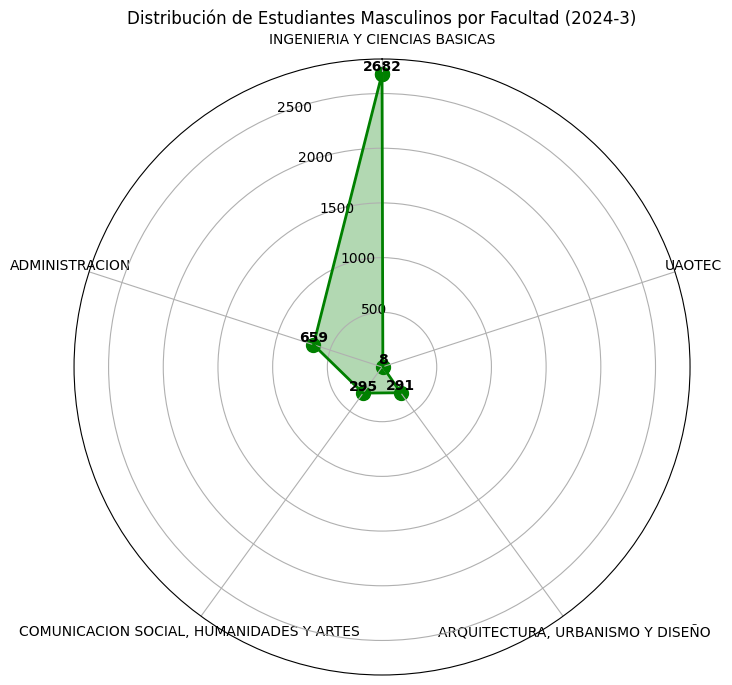

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
facultades = df_resultado["Facultad"]
estudiantes = df_resultado["Total_Estudiantes_Masculinos"]

# Crear ángulos para cada facultad
N = len(facultades)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
estudiantes = estudiantes.tolist()

# Cerrar el gráfico uniendo el primer punto con el último
angles.append(angles[0])
estudiantes.append(estudiantes[0])

# Crear gráfico polar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi / 2)  # Ajustar inicio de los ángulos

# Graficar puntos en color
ax.scatter(angles, estudiantes, color='green', s=100, label="Estudiantes")

# Unir los puntos con líneas
ax.plot(angles, estudiantes, color='green', linewidth=2, linestyle='solid')

# Sombrear el área bajo la curva
ax.fill(angles, estudiantes, color='green', alpha=0.3)

# Configurar etiquetas en el eje X (facultades)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(facultades, fontsize=10, rotation=45)

# Agregar valores en los puntos
for angle, value in zip(angles[:-1], estudiantes[:-1]):
    ax.text(angle, value + 2, str(value), fontsize=10, color='black', ha='center', va='bottom', fontweight='bold')

# Configurar título
ax.set_title("Distribución de Estudiantes Masculinos por Facultad (2024-3)", fontsize=12)

# Mostrar gráfico
plt.show()
